,club,position,minutes_played,match_played,goals,assists,distance_covered
0,22,Goalkeeper,1230,13,0,0,408
1,22,Forward,1199,13,4,6,67
2,22,Forward,1106,12,15,1,55
3,22,Midfielder,1077,13,0,4,57
4,22,Defender,1076,12,0,0,37



📌 Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   club              747 non-null    int64 
 1   position          747 non-null    object
 2   minutes_played    747 non-null    int64 
 3   match_played      747 non-null    int64 
 4   goals             747 non-null    int64 
 5   assists           747 non-null    int64 
 6   distance_covered  747 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 41.0+ KB


None


📈 Estatísticas Descritivas:


,club,minutes_played,match_played,goals,assists,distance_covered
count,747.000000,747.00000,747.000000,747.000000,747.000000,747.000000
mean,15.554217,331.61178,5.089692,0.492637,0.376171,242.113788
std,9.083508,248.37193,2.721425,1.313321,0.845502,150.673445
min,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,116.00000,3.000000,0.000000,0.000000,111.500000
50%,15.000000,301.00000,5.000000,0.000000,0.000000,237.000000
75%,23.000000,492.00000,7.000000,0.000000,0.000000,370.500000
max,31.000000,1230.00000,13.000000,15.000000,7.000000,513.000000



📊 Distribuição da variável alvo 'position':


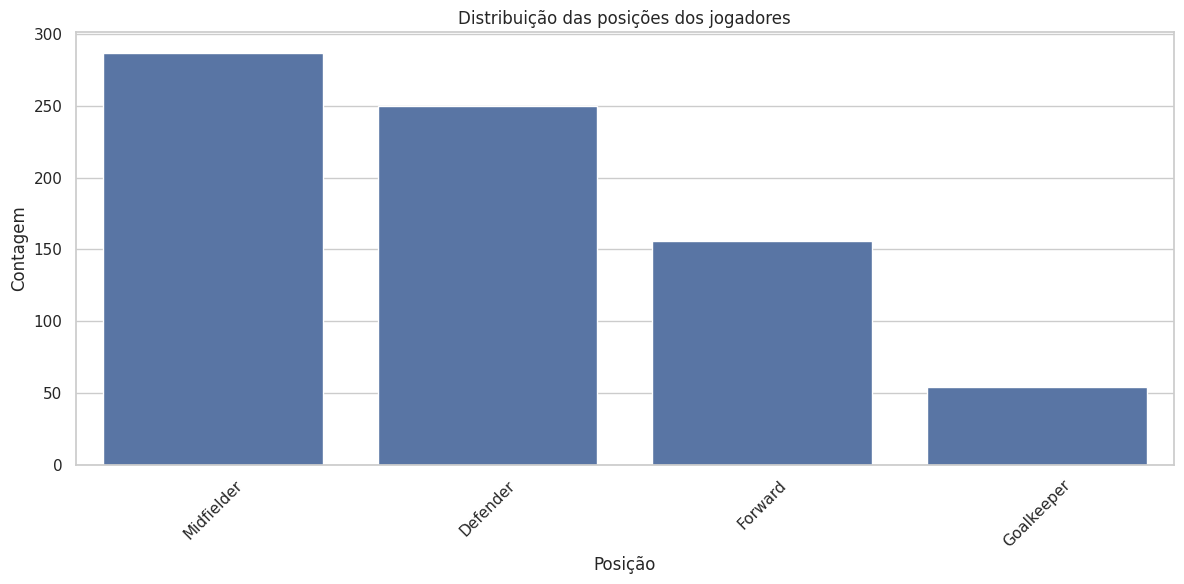

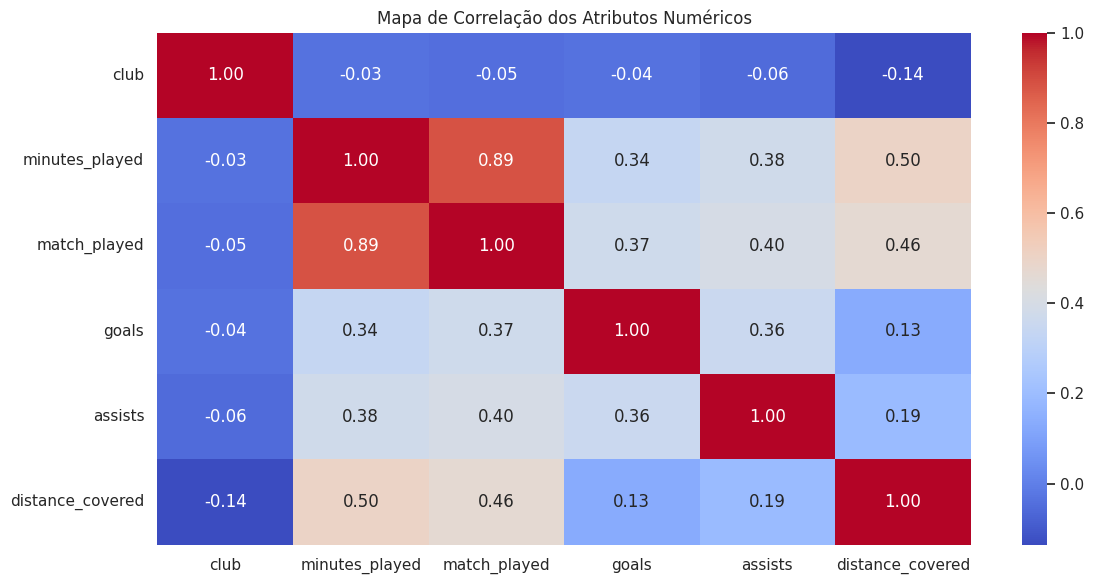

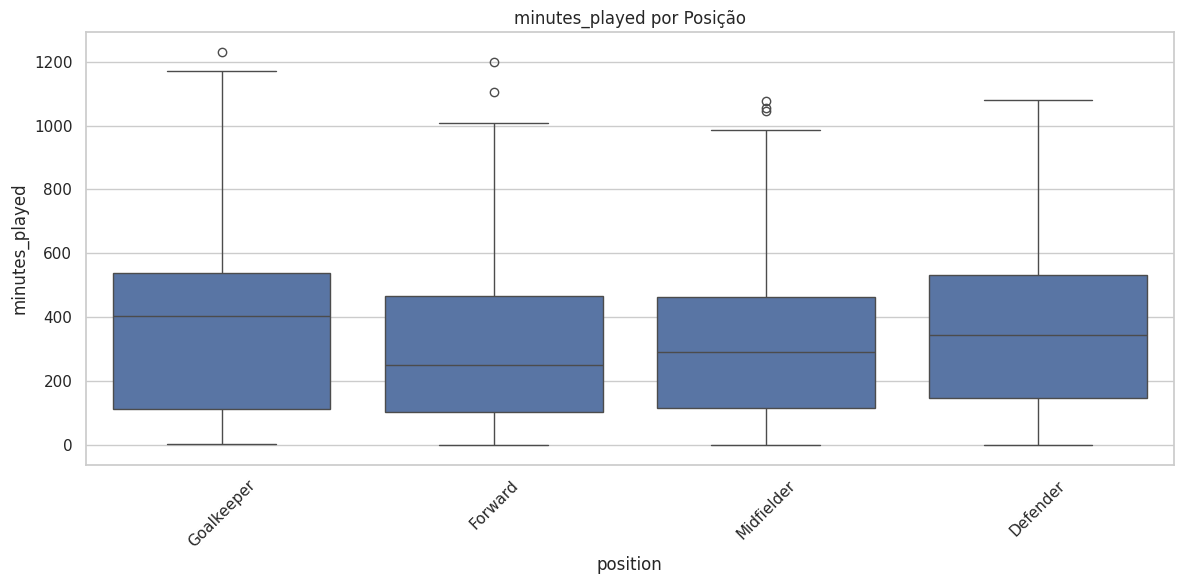

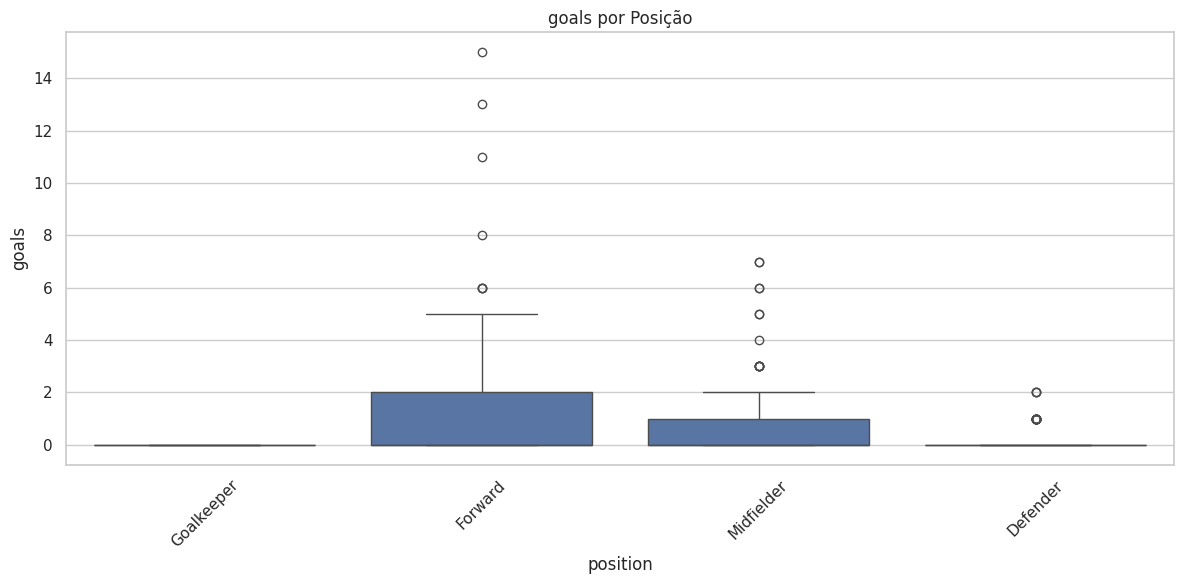

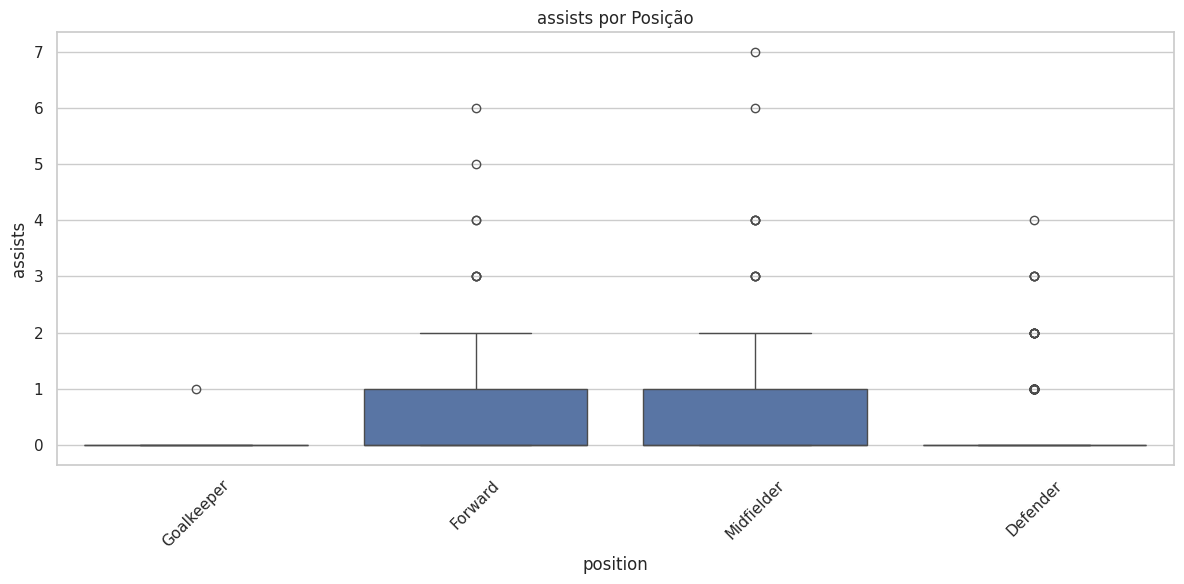

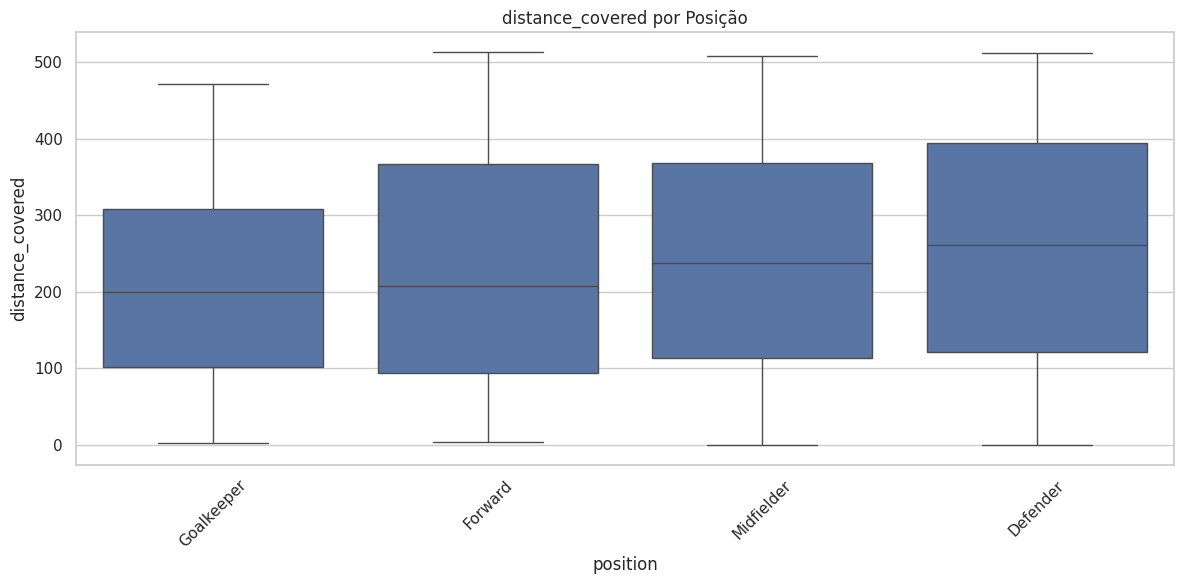

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configuração estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Caminhos
DATA_PATH = "../data/processed/key_stats_clean.csv"
PLOTS_DIR = "../results/plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Carregando os dados
df = pd.read_csv(DATA_PATH)

# Exibir as primeiras linhas
display(df.head())

# Informações básicas
print("\n📌 Informações Gerais:")
display(df.info())

# Estatísticas descritivas
print("\n📈 Estatísticas Descritivas:")
display(df.describe())

# Distribuição das classes-alvo (position)
print("\n📊 Distribuição da variável alvo 'position':")
sns.countplot(x="position", data=df, order=df["position"].value_counts().index)
plt.title("Distribuição das posições dos jogadores")
plt.xlabel("Posição")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/distribuicao_posicoes.png", dpi=300, bbox_inches="tight")
plt.show()

# Verificar correlação entre atributos numéricos
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação dos Atributos Numéricos")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/correlacao_atributos.png", dpi=300, bbox_inches="tight")
plt.show()

# Boxplot de atributos mais relevantes por posição
selected_cols = ['minutes_played', 'goals', 'assists', 'distance_covered']
for col in selected_cols:
    sns.boxplot(x="position", y=col, data=df)
    plt.title(f"{col} por Posição")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/boxplot_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()
